In [3]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

from scipy import signal

from droplets import do_cutouts
from droplets import do_metrics
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import gc

In [4]:
#import droplets as drop
# dir(drop)

### DIRECTORY LOOP BELOW

In [10]:
# directories_with_inputs=['/Users/olofjonsson/Projects/Ice/Droplet_codes/Package/Example_images']#,
#dir_for_results = '/Volumes/LaCie Drive/Lab/Results'

directories_with_inputs = ['/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40',
                           '/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Medium_30_40_gain47.9', '/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Diffusor_30_40mm_gain40']
#directories_with_inputs = ['/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Diffusor_30_40mm_gain40']


dir_for_results = '/Volumes/LaCie Drive/Lab/Results/200922'

In [11]:
cuts = []
metrics = []
fig = None
cut = None

for directory_with_input_index, directory_with_input in enumerate(directories_with_inputs):
    path_to_files = directory_with_input
    path_to_results = '/'.join([dir_for_results,
                                'Cuts' + directory_with_input])
    os.makedirs(path_to_results, exist_ok=True)

    path_to_diagnostics = '/'.join([dir_for_results,
                                    'Diagnostics' + directory_with_input])
    os.makedirs(path_to_diagnostics, exist_ok=True)

    list_of_files = [my_file for my_file in os.listdir(
        path_to_files) if not my_file.startswith('.')]  # to avoid hidden files like .DS_file
    print(directory_with_input+':')
    print('found {0} files'.format(str(len(list_of_files))))
    list_of_files.sort()
    print('sorted')

    list_of_files_to_do = list_of_files.copy()[100:200]

    metrics_list = [None]*len(list_of_files_to_do)
    index_list = [None]*len(list_of_files_to_do)
    
    if True:  # Do all

        for file_index, file_name in enumerate(list_of_files_to_do):
            full_path = os.path.join(path_to_files, file_name)
            #image = cv2.imread(full_path)

            print(full_path)

            #temp_file = ImageFile(path_to_files, file_name)
            # metric,cut=GD_metric(image,d_um=2.2)
            show_diagnostics = True
            cuts, metrics, fig = do_cutouts(full_path, d_um=2.2, smallest_size_um2=10000,
                                            closing_kernel=30, threshold_fraction=0.15, show_diagnostics=show_diagnostics)

            # Make this True if you want to see the cuts
            if False:
                for cut_index, cut in enumerate(cuts):
                    plt.figure()
                    plt.imshow(cut, cmap='gray', vmin=0, vmax=255)
                    # plt.colorbar()
                    plt.title('{0:.0f}'.format(metrics[cut_index]))

            if True:
                for cut_index, cut in enumerate(cuts):
                    cv2.imwrite('{0}/{3}_cut{2}_metric_{1:.0f}'.format(path_to_results,
                                                                       metrics[cut_index], cut_index, file_name), cut)

            if show_diagnostics:
                fig.savefig(
                    '{0}/diag_{1}'.format(path_to_diagnostics, file_name), format='png')

            plt.close('all')

    if False:  # Only metrics

        for file_index, file_name in enumerate(list_of_files_to_do):
            full_path = os.path.join(path_to_files, file_name)
            #image = cv2.imread(full_path)

            print(full_path)

            #temp_file = ImageFile(path_to_files, file_name)
            # metric,cut=GD_metric(image,d_um=2.2)
            metrics = do_metrics(full_path, d_um=2.2, smallest_size_um2=10000,
                                 closing_kernel=30, threshold_fraction=0.15)
            metrics_list[file_index] = metrics
            index_list[file_index] = file_index

            plt.close('all')
        np.save('{0}/metrics_list_0-100'.format(path_to_diagnostics,
                                          file_name), metrics_list)
        np.save('{0}/index_list_first0-100'.format(path_to_diagnostics, file_name), index_list)

        #print('{0:.3f}\t {1}'.format(metric,file_name))

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40:
found 2000 files
sorted
/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115935-99.png
Unreachable objects: 2775183
Remaining Garbage:
[]

Unreachable objects: 0
Remaining Garbage:
[]

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115936-101.png
Unreachable objects: 175
Remaining Garbage:
[]

Unreachable objects: 0
Remaining Garbage:
[]

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115936-102.png
Unreachable objects: 230
Remaining Garbage:
[]

Unreachable objects: 0
Remaining Garbage:
[]

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115936-103.png
Unreachable objects: 140
Remaining Garbage:
[]

Unreachable objects: 0
Remaining Garbage:
[]

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115936-104.png
Unreachable o

/Users/olofjonsson/Projects/Ice/Droplet_codes/Package/droplets.py:244: UserWarning: No contour levels were found within the data range.
  ax_topright.contour(filtered,levels=[threshold],colors=['red'])


Unreachable objects: 50
Remaining Garbage:
[]

Unreachable objects: 0
Remaining Garbage:
[]

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115937-108.png
Unreachable objects: 220
Remaining Garbage:
[]

Unreachable objects: 0
Remaining Garbage:
[]

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115938-109.png
Unreachable objects: 140
Remaining Garbage:
[]

Unreachable objects: 0
Remaining Garbage:
[]

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115938-110.png
Unreachable objects: 185
Remaining Garbage:
[]

Unreachable objects: 0
Remaining Garbage:
[]

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115938-111.png
Unreachable objects: 225
Remaining Garbage:
[]

Unreachable objects: 0
Remaining Garbage:
[]

/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/255kHz_48ulpermin-06012020115938-112.png
Unreachable

### WIDGET BELOW

In [ ]:
import sys


def get_size(obj, seen=None):
    """Recursively finds size of objects in bytes"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if hasattr(obj, '__dict__'):
        for cls in obj.__class__.__mro__:
            if '__dict__' in cls.__dict__:
                d = cls.__dict__['__dict__']
                if inspect.isgetsetdescriptor(d) or inspect.ismemberdescriptor(d):
                    size += get_size(obj.__dict__, seen)
                break
    if isinstance(obj, dict):
        size += sum((get_size(v, seen) for v in obj.values()))
        size += sum((get_size(k, seen) for k in obj.keys()))
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum((get_size(i, seen) for i in obj))

    if hasattr(obj, '__slots__'):  # can have __slots__ with __dict__
        size += sum(get_size(getattr(obj, s), seen)
                    for s in obj.__slots__ if hasattr(obj, s))

    return size


for index, thing in enumerate(locals().items()):
    print(get_size(thing[1]))

In [ ]:
# globals().values()
import pprint

for i in range(2):
    print('Collecting %d ...' % i)
    n = gc.collect()
    print('Unreachable objects:', n)
    print('Remaining Garbage:', )
    pprint.pprint(gc.garbage)
    print()

In [ ]:
huge = np.random.random([1000, 1000])

In [31]:
gc.collect()

50

In [27]:
import sys


def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['', 'Ki', 'Mi', 'Gi', 'Ti', 'Pi', 'Ei', 'Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)


for name, size in sorted(((name, sys.getsizeof(value)) for name, value in globals().items()),
                         key=lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                 list_of_files: 16.2 KiB
           list_of_files_to_do: 15.7 KiB
                          _i12:  2.1 KiB
                          _i13:  2.1 KiB
                           _i4:  2.1 KiB
                           _i5:  2.1 KiB
                   interactive:  1.0 KiB
                         fixed:  1.0 KiB
                           _ii:  588.0 B
                          _i25:  588.0 B


In [ ]:
np.shape(cuts[1])

In [ ]:
# path to file to run widget on
file_path = '/Users/olofjonsson/Projects/Ice/Droplet_codes/Package/Example_images/255kHz_48ulpermin-06012020122750-15.png'

In [ ]:
def test_params(path_to_image,
                threshold_fraction=0.15,
                closing_kernel=30,
                smallest_size_um2=10000,
                d_um=2.2,
                scaling=0.345):
    cuts, metrics, fig = do_cutouts(path_to_image=path_to_image, d_um=d_um, closing_kernel=closing_kernel,
                                    threshold_fraction=threshold_fraction, scaling=scaling, show_diagnostics=True)
    fig.show()


_ = interact(test_params, path_to_image=fixed(file_path),
             d_um=widgets.FloatSlider(min=0.1, max=100, value=2.2),
             closing_kernel=widgets.IntSlider(min=1, max=100, value=30),
             smallest_size_um2=widgets.FloatSlider(
                 min=1, max=1e6, value=10000),
             threshold_fraction=widgets.FloatSlider(
                 min=0.01, max=1, value=0.15),
             scaling=fixed(0.345))

In [7]:
diffusor_metrics = np.load(
    '/Volumes/LaCie Drive/Lab/Results/200922/Diagnostics/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Diffusor_30_40mm_gain40/metrics_list.npy', allow_pickle=True)
pinhole_metrics = np.load(
    '/Volumes/LaCie Drive/Lab/Results/200922/Diagnostics/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Medium_30_40_gain47.9/metrics_list.npy', allow_pickle=True)
normal_metrics = np.load(
    '/Volumes/LaCie Drive/Lab/Results/200922/Diagnostics/Volumes/LaCie Drive/Lab/Raw_data/Home_lab/200602/Normal_30_40/metrics_list.npy', allow_pickle=True)

/Users/olofjonsson/.virtualenvs/opython/lib/python3.8/site-packages/numpy/lib/histograms.py:671: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, _ = _get_bin_edges(a, bins, range, weights)


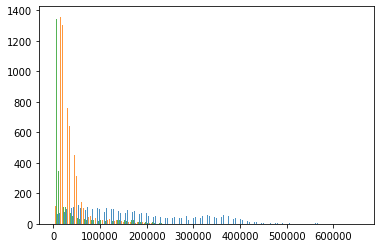

In [8]:
n=plt.hist([np.concatenate(diffusor_metrics).ravel(), np.concatenate(pinhole_metrics).ravel(
), np.concatenate(normal_metrics).ravel()], 
           label=['diffusor', 'pinhole', 'normal'],  
           cumulative=False,
           stacked=False,
           log=False,
           density=False,
           bins='stone',
           alpha=0.8)

ValueError: x and y must have same first dimension, but have shapes (131,) and (130,)

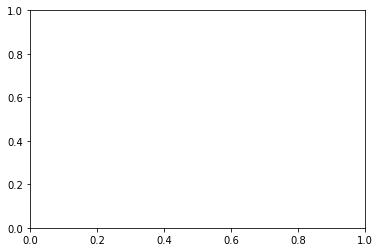

In [9]:
plt.plot(n[1],n[0][0])
plt.plot(n[0][2],n[0][1])
plt.plot(n[0][2],n[0][2])

In [55]:
n[0]

array([[5.100e+01, 6.100e+01, 7.200e+01, 8.000e+01, 7.800e+01, 9.400e+01,
        1.040e+02, 1.020e+02, 1.100e+02, 1.280e+02, 1.250e+02, 1.010e+02,
        1.090e+02, 9.000e+01, 1.080e+02, 1.170e+02, 9.700e+01, 9.700e+01,
        1.010e+02, 9.700e+01, 1.080e+02, 7.900e+01, 1.010e+02, 9.300e+01,
        9.900e+01, 9.700e+01, 1.030e+02, 8.500e+01, 6.800e+01, 1.030e+02,
        7.300e+01, 8.900e+01, 7.400e+01, 7.600e+01, 8.300e+01, 8.400e+01,
        6.300e+01, 7.300e+01, 5.700e+01, 6.900e+01, 5.200e+01, 4.200e+01,
        4.600e+01, 4.800e+01, 4.200e+01, 4.700e+01, 4.000e+01, 4.100e+01,
        3.800e+01, 3.600e+01, 3.900e+01, 4.400e+01, 3.800e+01, 3.600e+01,
        3.500e+01, 4.500e+01, 4.900e+01, 2.600e+01, 3.800e+01, 4.000e+01,
        4.300e+01, 4.500e+01, 4.100e+01, 4.900e+01, 4.000e+01, 5.500e+01,
        4.900e+01, 5.400e+01, 4.400e+01, 4.100e+01, 5.000e+01, 4.200e+01,
        5.700e+01, 4.800e+01, 5.000e+01, 4.700e+01, 3.400e+01, 3.700e+01,
        3.300e+01, 2.900e+01, 2.300e+0

In [68]:
n[1]

array([  2494.41827737,   7517.35246481,  12540.28665225,  17563.22083969,
        22586.15502713,  27609.08921458,  32632.02340202,  37654.95758946,
        42677.8917769 ,  47700.82596434,  52723.76015178,  57746.69433923,
        62769.62852667,  67792.56271411,  72815.49690155,  77838.43108899,
        82861.36527643,  87884.29946388,  92907.23365132,  97930.16783876,
       102953.1020262 , 107976.03621364, 112998.97040108, 118021.90458853,
       123044.83877597, 128067.77296341, 133090.70715085, 138113.64133829,
       143136.57552573, 148159.50971318, 153182.44390062, 158205.37808806,
       163228.3122755 , 168251.24646294, 173274.18065038, 178297.11483783,
       183320.04902527, 188342.98321271, 193365.91740015, 198388.85158759,
       203411.78577503, 208434.71996248, 213457.65414992, 218480.58833736,
       223503.5225248 , 228526.45671224, 233549.39089969, 238572.32508713,
       243595.25927457, 248618.19346201, 253641.12764945, 258664.06183689,
       263686.99602434, 2